# Statistical Rethinking 2

## Installation

I first installed R with homebrew (`brew install R`) but this didn't work out well and I couldn't install the other packeges (`rstan` and `rethinking`). Only after uninstalling R with homebrew and doin a manual installation via the [R website](https://cran.r-project.org/bin/macosx/) I could follow the installation instructions provided by McElreath. 

A useful line of code to see whether a package is actually installed is running `"{name-package}" %in% rownames(installed.packages())`. If the installation of the `{name-package}` was succesfull, this code should return `TRUE`. However, it only seems to work on the command line and not in this notebook.

## Definities hoofdstuk 1

- **Bayesian statistics**: stamt van een theorie geformuleerd in 1763(!) door Thomas Bayes, die ervan uitgaat dat je de waarschijnlijkheid (_probability_) of kans van een gebeurtenis kan benaderen op basis van bestaande kennis over factoren gerelateerd aan die gebeurtenis. Een voorbeeld: als kanker (een _event_) gerelateerd is aan iemands leeftijd, dan kun je leeftijd gebruiken om de kans op kanker beter te benaderen dan als je diens leeftijd niet kent. Bayesian statistics is dus een vorm van statistiek waarin de kansverdeling de mate aangeeft waarin iemand in een event gelooft ("probability expresses the degree of believe in an event"). Als er nieuwe data beschikbaar is, wordt de waarschijnlijkheid opnieuw uitgerekend. Omdat er voor dit (her)berekenen veel computationele kracht nodig is, werd Bayesiaanse statistiek pas populair met de opkomst van de computers.

- **Bayesian inference**: het tellen en vergelijken van mogelijkheden. Vgl. Borges' ["Garden of Forking Paths"](https://en.wikipedia.org/wiki/The_Garden_of_Forking_Paths): om goed te kunnen deduceren wat er echt gebeurde, zou je alles wat had kunnen gebeuren moeten overwegen. 

- **Bayesiaanse data analyse**: een logische procedure om informatie te verwerken. Onderzoeksvraag >> statistisch model >> testen met logica >> _probability distributions_. Met andere woorden: als we uitgaan van onze aannamens, kunnen we uitrekenen op hoeveel manieren iets gebeurd. Het is als de "Garden of Forking Data" waarin we verschillende mogelijke reeksen van gebeurtenissen laten groeien. Terwijl we erachter komen wat er gebeurd is, kunnen de reeksen ordenen ("a quantitative ranking") en sommigen snoeien. Uiteindelijk houden we één reeks over die logisch overeenkomt met onze kennis.

- **Bayesian updating**: het bijwerken van je model op basis van nieuwe data (_posterior plausibilities_). Iteratief, net als vele andere vormen van modeleren. 

- **data**: een reeks van observaties, bijv. de knikkers die je uit een zak haalt (blauw-wit-wit-wit), of de keren dat je land of water aanraakt bij het opgooien van een wereldbol (l-w-w-w-w-l-l-w-l).

- **Probability theory**: counting the ways things can happen.

- **De null hypothese**: een algemene stelling og aanname dat er niets nieuws gebeurt, bijv. er zijn geen associates tussen groepen of geen relatie tussen twee gemeten fenomemen. Het is vaak de uitgangshypothese (H0). NOOT: als je de null hypothese gaat testen met een "null hypothesis significance testing" dan test je *niet* een daadwerkelijke onderzoekshypothese. Wat je  falsificeert is alleen de null hypothese; niet het achterliggende model.

- Een **power law**: een functioneel verband tussen twee hoeveelheden, waarin een relatieve verandering in één hoeveelheid een proportionele verandering in de andere hoeveelheid teweeg brengt. Deze verandering is onafhankelijk van de oorspronkelijke grootte van de hoeveelheden → één hoeveelheid is de macht (_power_) van de ander.

- Een **exponential family**: een _parametric set of probability distributions of a certain form_. [??] Iets met kansverdeling en parameters?

- **Falsicatie**: hypothese H volgt uit observatie D. Als we D niet kunnen vinden, dan is H gefalsificeerd. Vgl.: alle zwanen zijn wit (H) >> in Europa zijn alleen maar witte zwanen (D). Omdat er in Australië wel zwarte zwanen zijn, kunnen we niet langer zeggen dat H waar is. De meeste hypotheses zijn echter niet zo stellig, maar eerder in de trant van "80% van de zwanen is wit". Hoe kun je deze stelling falsificeren? Bovendien is falsificatie altijd gebaseerd op wetenschappelijke consensus, _niet_ op logica. De argumenten waarop deze consensus is gebaseerd zijn vaak rommelig of verward.

- **Frequentist analysis**: _probabilities_ worden gedefinieerd door deze in verband te brengen met hoe vaak iets voorkomt in grote data sets. Dit kan worden berekend door het herhalen van de metingen met de _imaginary resampling of data_: als een meting heel veel herhaald wordt, eindigen we met een lijst van waarden waarin een zeker patroon te ontdekken valt. Dit werkt niet altijd: soms kun je iets nog zo vaak herhalen zonder dat er iets verandert. In tegenstelling tot Bayesiaanse statistiek, waarbij een kans wordt toegewezen aan een hypothese, wordt bij de frequentistische aanpak alleen een hypothese getoetst zonder daar een kans aan te verbinden.

- **sampling distribution**: de verspreiding van de metingen (vgl. met _probability distributions_).

- **lineaire regressie**: bijv., op basis van de temperatuur voorspellen hoeveel ijsjes er worden verkocht en vaststellen of dit verband significant is. Met één of meerdere variabelen (bijv. de temperatuur, het besteedbaar inkomen ...).

- **Overfitting**: de paradox van voorspellingen, _fitting is easy; prediction is hard_. Toekomstige data is niet hetzelfde als data uit het verleden, en elk model dat hier geen rekening mee houdt (hoe complex het model ook moge zijn) zal daarom slechtere voorspellingen doen. Kan worden gespot door _cross validation_ en _information criteria_ en worden tegengegaan door _partial pooling_.

- **partial pooling**: voegt informatie uit verschillende data units samen om voor alle units een betere schatting te kunnen berekenen. Simpel gezegd gaat deze techniek ervan uit dat er tussen de data units variatie bestaat. 

- **multilevel modeling**: de hype in Bayesiaan statistiek. Door multilevel models toe te passen kun je rekening houden met veel verschillende vormen van variatie. Voorbeeld: het voorspellen van verkiezingsuitslagen, waarbij meerdere modellen meespelen (polls, eerdere uitslagen, deelresultaten, uitslagen van verwante districten, etc). 

- **parameter**: een aangenomen schatting (_a conjectured proportion_) van een hoeveelheid, _p_; iets dat je niet kunt observeren maar moet uitrekenen. Bijvoorbeeld de hoeveelheid water op een globe.

- **likelihood**: het aantal manieren waarop een parameter _p_ de data kan produceren. Een _likelihood_ is berekend door alle mogelijke data reeksen die hadden kunnen gebeuren op te tellen, en dan de reeksen die niet overeenkomen met de data te elimineren. Vgl. de "Garden of Forking Paths". Term komt uit de conventionele statistiek > _"a distribution funciton assigned to an observed variable"_. 

- **prior probability**: de waarschijnlijkheid van een specifieke _p_ waarde bij eerste berekening

- **posterior probability**: de waarschijnlijkheid van een specifieke _p_ waarde na een volgende berekening

- **variabele**: een symbool dat verschillende waarden kan hebben. Het kan zowel iets zijn wat we willen uitrekenen en niet kunnen observeren (bijv. de hoeveelheid water op de globe), dan heet het een **parameter**. Het kan ook iets zijn dat we kunnen observeren (bijv. het aantal keer dat je land gooit), dat zijn **observed variables**.

- **binominal distribution**: de standaard _coin tossing_ verdeling die ervan uitgaat dat (1) elke gooi is onafhankelijk van de vorige en (2) de kans dat je kop of munt gooit is bij iedere gooi hetzelfde.

# Chapter 1

### Belangrijke uitgangspunten

1. Een hypothese ≠ model: het model volgt vanuit een hypothese. Als je een model falsificeert, is dat niet hetzelfde als een hypothese falsificeren.

2. Er is onderscheid tussen een _process model_ en een _statistical model_. Simpel gezegd volgt een _process model_ uit een hypothese en test je een _process model_ met data door middel van een _statistical model_:  hypothese >> process model >> statistical model.

3. De relatie tussen model en hypothese niet 1-op-1: één hypothese is niet verbonden aan één uniek model; andersom is één model niet per sé verbonden aan één unieke hypothese. 

4. Hypotheses gebaseerd op observaties zijn moeilijk te staven gezien de complexe context waarin observaties gemaakt worden (o.a. _false positives_ of _false negatives_).

5. Metingen kunnen misgaan; dit is regel eerder dan de uitzondering.

6. _Overfitting_ kan worden gesignaleerd door _cross validation_ en _information criteria_, en worden tegengegaan door _partial pooling_.

7. Het is erg lastig om statistisch te deduceren, om twee redenen: 
    (1) Verschillende _process models_ zijn verbonden met dezelfde statistische model. Een oplossing hiervoor is om te kijken naar andere aspecten van de _process models_. Vb: twee _process models_ voorspellen ongeveer hetzelfde wat betreft _frequency distribution_, maar ze voorspellen iets heel anders als het gaat om de de verspreiding van veranderingen over tijd. 
    (2) Een statistisch model alleen is niet voldoende om causaliteit af te leiden, want het maakt geen onderscheid tussen oorzaak en gevolg: het detecteert slechts een verband tussen oorzaak en gevolg. Vb: een statistich model detecteert een verband tussen de wind en de bewegende takken, maar niet of de wind te takken doet bewegen of dat de takken de wind doen blazen. 

### Modellen vergelijken

In de Bayesiaanse statistiek bestaan meerdere modellen. Hoe weet je welk model geschikt is, met andere woorden, welk model de beste voorspellingen doet (_predictive accuracy_)? Hiervoor kun je gebruik maken van *cross validation* of *information criteria*. 

Nadat je met deze twee methodes _overfitting_ hebt opgespeurd, kun je dit tegengaan door _partial pooling_ (→ multilevel modeling) en _causal identification_ (een model waarin wordt aangegeven welke variabelen elkaar beinvloeden). De causale modelen komen vaak in de vorm van DAGs waarin een causale hypothese is uitgetekend. 

# Chapter 2


Een model is altijd een simplificatie van de werkelijkheid. 

### Counting 
Je start met een gegeven en een vraagstuk hierover, bijv: "gegeven deze zak met vier blauwe en witte knikkers (>je kennis) en je hebt drie keer blind een knikker getrokken (> je data/observatie). Hoeveel blauwe en hoeveel witte knikkers zitten er in de zak? (> je vraag)" 

Op basis van de data en je kennis weet je dat er vijf mogelijkheden zijn (_conjectures_ of **parameter value**). Welke van de vijf mogelijkheden is het meest plausibel? Dit kun je berekenen door te tellen.

### Combining other information

Je krijgt extra informatie, dus deze wil je meenemen in je berekeningen van de plausibiliteit. Je oorspronkelijke berekeningen zijn **prior**. Deze vermenigvuldig je met de nieuwe bevindingen. Deze nieuwe bevindingen zijn **posterior**. In sommige gevallen is de data van hetzelfde type (knikkers _all the way_); in andere gevallen is een ander type data. 

Welke aanname moet je gebruiken als je geen andere informatie over de conjectures hebt? **Principle of indifference**

### From counts to probability
Hoe groter je dataset, hoe moeilijker het wordt om alle mogelijkheden te tellen. Daarom zul je al snel overstappen op het wiskundig uitrekenen van waarschijnlijkheid (_probability_).  
Voorbeeld: `For [xooo], p = 1/4 = 0.25`, waarbij *p* staat voor de hoeveelheid blauwe knikkers in een reeks van vier. `Dnew = xox`, waarbij _Dnew_ staat voor een nieuwe observatie. Dat kun je wiskundig uitdrukken als: `plausibility of p after Dnew ∝ ways p can produce Dnew × prior plausibility of p`, waarbij ∝ betekent "evenredig aan". In mensentaal zeg je dus: voor iedere waarde van _p_ (_p value_), is de kans dat evenredig aan het aantal manieren waarop het door de "Garden of Forking Data" kan gaan. Tot slot wordt de kansberekening gestandardiseerd door te zorgen dat de som van alle mogelijkheden 1 is.

In [1]:
ways <- c(0,3,8,9,0)
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

### Vragen: 

1. Code 2.1, o. 27. Het moge dan "makkelijk" zijn om bovenstaande berekeningen in R uit te voeren, maar de "ways to produce data" zijn nog altijd handmatig geteld op basis van de graph. Dit moet toch anders kunnen?
2.  Is het de bedoeling dat we deze formules uit ons hoofd leren of dat we ze daadwerkelijk doorgronden (of beiden)?

### Reflecties
Wat ik prettig vind is dat al snel duidelijk wordt dat de modellen die we gebruiken beperkt zijn door de data (de observaties uit de realiteit). Je hebt een zak knikkers en doet drie grepen uit die zak; je hebt een wereldbol en gooit 'm zes keer op - op die informatie bouw je een model en voer je berekeningen uit. De realiteit is veel complexer, maar je moet roeien met de riemen die je hebt. 

McElreath geeft aan dat het voor andere methodes gebruikelijk is om te stellen dat ze alleen betrouwbaar zijn bij een grote _sample set_ (>30). De Baysiaanse statistiek is echter toepasbaar op data sets van elke grootte. Het risico is eerder dat het model uitgaat van de prior plausibilities: als deze slecht zijn, zal het resultaat misleidend zijn.

### Vragen
- afbeelding 2.5: waarom is het uitgangspunt (de stippellijn in de grafiek linksboven) niet ergens anders (bijv. halverwege de y-as)? > De prior is arbitrair, maar op basis waarvan kies je de OG prior? 
- p. 36: hier gaat het over de _posterior distribution_. Is dat hetzelfde als de _posterior plausibility_? Daarvoor had McElreath het steeds over de _prior plausibility_. Wat is de relatie tussen deze begrippen?

### Uitgangspunten

Je kunt drie dingen tellen/berekenen:

- De manieren waarop een mogelijkheid [xooo] een observatie/data kan produceren
- Het totaal aantal manieren waarop elke mogelijkheid de gehele dataset kan produceren
- De mate van waarschijnlijkheid waarin een bepaalde mogelijkheid tot de dataset leidt. Bijv. hoe waarschijnlijk is een sample van lengte N, uit de alle mogelijke samples?

Binominale verdeling is ingebouwd in R: `dbinom ( {likelihood-of-data} , {size-of-data}, probability)`

In [3]:
# Wat is de binominale distributie (de kans) dat je zes keer kop gooit bij negen keer een munt opgooien,
# waarbij de kans dat je kop of munt gooit voor elke gooi 0.5 is?
dbinom(6, 9, 0.5)

[1] 0.1640625

De uitkomst van de `dbinom` formule is het aantal paden door de "Garden of Forking Paths". 

Voor elke parameter in je Bayesiaanse model moet je eerst de _prior plausibility_ definiëren. 

`W ∼ Binomial(N, p)` met N = W + L. Hiermee zeg je dat het aantal manieren om tot W te komen in N keer gooien met per gooi de waarschijnlijkheid van *p* wordt uitgerekend door de binominale verdeling.

`p ~ Uniform(0,1)` betekent dat *p* een uniforme (platte) prior heeft, van nul tot één. 

Daarna definieer je de _posterior distribution_. Voor elke unieke combinatie van (data, waarschijnlijkheid, parameters, prior) is er ook een unieke _posterior distribution_. Deze staat in relatie tot het product van de prior en de mogelijkheid van de data. Voor elke specifieke waarde van *p*, het aantal paden door de Garden of Forking Data is het product van het eerdere (_prior_) aantal paden + het nieuwe aantal paden. 

De formule:

`Posterior = (Probability of the data × Prior)/ Average probability of the data`

Een Bayesiaans model is een machine. De machine heeft enkele ingebouwde definities: _likelihood_, parameters, prior. De machine verwerkt data en produceert op basis daarvan een posterior. Het is gebaseerd op Bayes' theorie. 

Uit deze theorie volgen een aantal wiskundige aannames. Er bestaan een aantal technieken om deze wiskundige aannames te benaderen, waarvan er drie in  besproken worden:

1. Grid approximation 
De meeste parameters kunnen een onbepaalde reeks van waarden krijgen, maar de _posterior distribution_ kan goed worden uitgerekend als je slechts een bepaalde reeks bekijkt. Voor iedere waarde van de parameter *p'* kun je de _posterior_ berekenen door de _prior_ van *p'* te vermenigvuldigen met de _likelihood_ van *p'*. Als je dit herhaald voor iedere waarde van *p'* in het grid, dan heb je een goede schatting van de _posterior distribution_.
Nadeel: de methode schaalt niet goed; voordeel: het is een goede manier om te begrijpen hoe een Bayesiaans model continu wordt ge-update.

2. Quadratic approximation
3. Markov Chain Monte Carlo (MC Monte Carlo y'all!)



In [9]:
# R code 2.3
# Grid approximation

# Define grid (NB: why is it set at 20?)
p_grid <- seq (from=0, to=1, length.out=100)

# Define prior
# rep(x, ...) replicates the values in x
# here we replicate the values of prior 20 times
prior <- rep(1,100)

# compute the likelihood at each value in the grid
likelihood <- dbinom(6, 9, p_grid)

# compute the result of the likelihood multiplied by the prior
# this produces an unstandardized posterior
unstd.posterior <- likelihood * prior

# standardize the posterior
posterior <- unstd.posterior / sum(unstd.posterior)

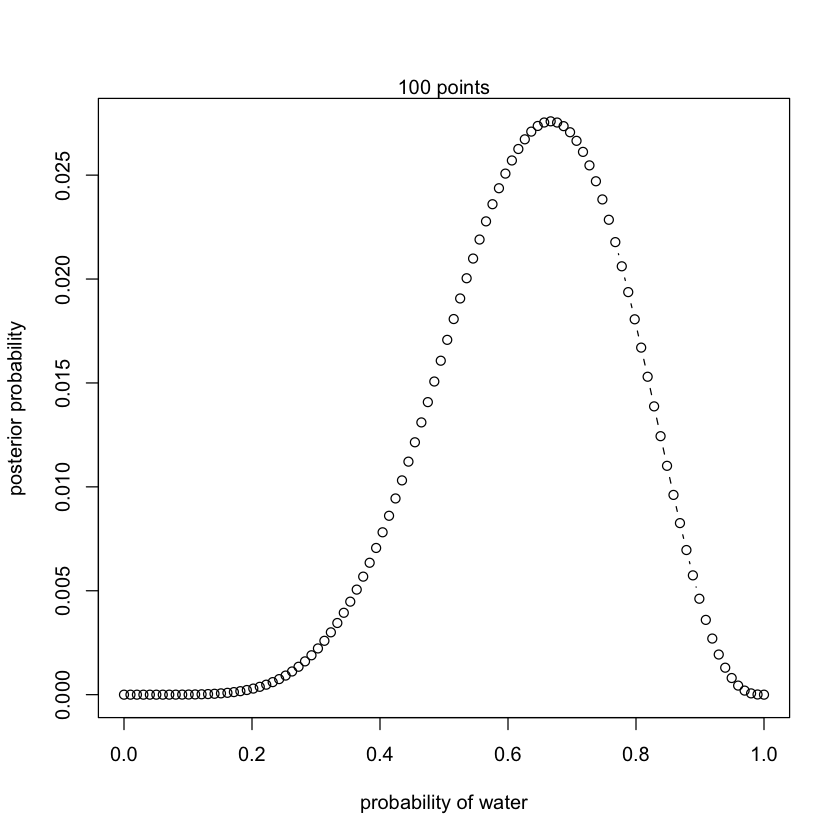

In [10]:
plot( p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability" )
mtext( "100 points" )